In [1]:
source("/secure/projects/HTAPP_MBC/src/init_phase2.R")

Registered S3 method overwritten by 'R.oo':
  method        from       
  throw.default R.methodsS3
Loading combined annotation: annot


In [2]:
theme_update(axis.text=element_text(color="black"), panel.grid.minor = element_blank(),panel.background = element_rect(fill = "white"))

In [3]:
out_dir=paste0(analysisDir,"/99_consolidate/")
dir.create(out_dir)
setwd(out_dir)

Warning message in dir.create(out_dir):
"'/scratch/projects/HTAPP_MBC//phase2/analysis//99_consolidate' already exists"

In [4]:
scsn=fread(paste0(baseDir,"/PyCache/fresh_frozen_combined_obs.tsv"))

In [106]:
scsn[,compartments:=factor(compartments,levels=c("Malignant","Stromal","Lymphoid","Myeloid"))]

In [13]:
sp=fread(paste0(projectDir,'/spatial/01_typing/plots/obs_all.tsv'))

In [103]:
sp[OT%in%c('MBC_neuronal','MBC_stem-like','MBC'),compartments_OT:="Malignant",]
sp[OT%in%c('NK','T','B','B_plasma'),compartments_OT:="Lymphoid",]
sp[OT%in%c('Macrophage','Monocyte','Mast'),compartments_OT:="Myeloid",]
sp[OT%in%c('Endothelial_angiogenic','Smooth muscle_vascular','Fibroblast','Endothelial_vascular','Hepatocyte','Endothelial_sinusoidal','Stellate','Endothelial','Neuron','Skeletal muscle'),compartments_OT:="Stromal",]

In [104]:
table(sp[is.na(compartments_OT)]$method)


scRNAseq 
  141774 

In [105]:
sp[,compartments_OT:=factor(compartments_OT,levels=c("Malignant","Stromal","Lymphoid","Myeloid")),]

In [6]:
head(scsn)

cellid,batch,cell_id,name,condition,replicate,orig.ident,nCount_RNA,nFeature_RNA,percent.mito,RNA_snn_res.0.8,seurat_clusters,labels,labels_score,labels_unif,labels_cl,labels_cl_unif,ccpm,Quality,Order,run status,Note,date,run_pipeline,Channel Name,Lane,Index,cancer,site,reference,chemistry,flowcell,seq_dir,mode,min_umis,min_genes,percent_mito,expected_cells,total_droplets,z_dim,z_layers,channel_id,label_concordance,labels_cl_unif_per_channel,filt_median_genes,filt_median_umi,pass,ccpm_id,ccpm_id_long,sample,htapp,sequenced,annotated,fresh,frozen,path_tumor_present,cohort,stage_at_diagnosis,metastatic_presentation,biopsy_days_after_dob,biopsy_days_after_diagnosis,biopsy_days_after_metastasis,prior_lines_tx_metastatic,prior_lines_tx_total,ER_primary_fraction,ER_primary,ER_biopsy_fraction,ER_biopsy,ER_concordance,PR_primary_fraction,PR_primary,PR_biopsy_fraction,PR_biopsy,PR_concordance,HER2_primary,HER2_biopsy,HER2_concordance,receptors_primary,receptors_biopsy,site_biopsy,site_biopsy_detail,grade_breast,histology_breast,histology_breast2,histology_biopsy,inflammatory,tx_last_before,tx_last_before_start,tx_last_before_end,tx_last_before_start_rel,tx_last_before_end_rel,tx_last_before_response,tx_concurrent,tx_concurrent_start,tx_concurrent_end,tx_last_before_start_rel.1,tx_last_before_end_rel.1,tx_concurrent_response,tx_next_after,tx_next_after_start,tx_next_after_stop,tx_last_before_start_rel.2,tx_last_before_end_rel.2,tx_next_after_response,oncopanel_RB_CNV,oncopanel_RB_SNV,oncopanel_ESR1,oncopanel_PIK3CA,oncopanel_FOXA1,oncopanel_EGFR,oncopanel_ERBB2,oncopanel_ERBB3,oncopanel_ERBB4,oncopanel_AR,oncopanel_AURKA,oncopanel_AURKB,oncopanel_FGFR1,oncopanel_FGFR2,oncopanel_FGFR3,oncopanel_FGFR4,oncopanel_KRAS,oncopanel_HRAS,oncopanel_BRAF,oncopanel_AKT1,ccpm_id_core,ccpmID,sampleid,cnv_sample,cnv_cellid,cnv_cluster,cnv_cors,cnv_cors_max,cnv_score,cnv_ref_score,cnv_score_norm,cnv_score_norm_norm,cnv_max_cluster,cnv_condition,cnv_mode,cnv_score_norm_norm2,cnv_cell_type,cnv_pass,cnv_pass_mal,pam50_cellid,pam50_Basal_single,pam50_Her2_single,pam50_LumA_single,pam50_LumB_single,pam50_Normal_single,pam50_mode_single,pam50_subtype_single,pam50_subtype_prob_single,pam50_subtype_filt_single,pam50_Basal_cluster,pam50_Her2_cluster,pam50_LumA_cluster,pam50_LumB_cluster,pam50_Normal_cluster,pam50_mode_cluster,pam50_subtype_cluster,pam50_subtype_prob_cluster,pam50_subtype_filt_cluster,S.Score,G2M.Score,Phase,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,n_counts,leiden,leiden_mal,labels_cl_unif2_mal,labels_cl_unif2,labels_cl_unif2_broad,named_cluster,concat,named_cluster_split,compartments,select_cell,cell_type,harmony_leiden
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<int>,<dbl>,<dbl>,<lgl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<lgl>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<int>
HTAPP-225-SMP-6756-TST-channel1_TGCATCCAGTTGCTGT-1-sn,sn,HTAPP-225-SMP-6756-TST-channel1_TGCATCCAGTTGCTGT-1,HTAPP-225-SMP-6756,TST,channel1,HTAPP-225-SMP-6756-TST-channel1,14400,6364,2.8472222,20,20,Epithelial cells,0.3230405,Epithelial,

In [14]:
head(sp)

V1,replicate,condition,cell_type,labels_unif,labels_cl_unif,labels_cl_unif2_broad,compartments,cnv_pass_mal,Phase,n_genes_by_counts,total_counts,pct_counts_mt,n_counts,n_genes,total_counts_mt,leiden,sample,method,x_orig,y_orig,x,y,ut_HE1,ImmuneCells_1,Tumor_1,Fibrosis_1,RCTD,OT,OT_max,Unidentifiable_1,ut_HE2,Vasculature_1,Unidentifiable_2,Tumor_2,ImmuneCells_2,Vasculature_2,Fibrosis_2,size,region,cluster,tmp_idx,ClusterID,sc/sn compartments,sc cell types,sn cell types,Necrosis_1,Necrosis_2,BloodClots_1,Fat_1,BloodClots_2,Fat_2,Normal_1,Normal_2,BloodVessels_1,BloodVessels_2,BloodVessel_1,BloodVessel_2,AcellularDebris_1,AcellularDebris_2
<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
HTAPP-944-SMP-7479-TST-channel1_CACAACACATCGTTCC-1,1,TST,MBC_neuronal,Epithelial,Epithelial,Epithelial_neuro,Malignant,TRUE,G1,5110,10332,14.711576,10332,5110,1520,9,HTAPP-944-SMP-7479,scRNAseq,NA,NA,NA,NA,NA,NA,NA,NA,,,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,,,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
HTAPP-944-SMP-7479-TST-channel1_TAACTTCAGCAACTCT-1,1,TST,MBC_neuronal,Neurons,Mesangial cells,Epithelial_neuro,Malignant,TRUE,G2M,6072,9930,2.749245,9930,6072,273,11,HTAPP-944-SMP-7479,scRNAseq,NA,NA,NA,NA,NA,NA,NA,NA,,,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,,,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
HTAPP-944-SMP-7479-TST-channel1_ACCTACCGTTCCTAAG-1,1,TST,MBC_neuronal,Epithelial,Epithelial,Epithelial_neuro,Malignant,TRUE,S,7505,19942,18.859694,19942,7505,3761,9,HTAPP-944-SMP-7479,scRNAseq,NA,NA,NA,NA,NA,NA,NA,NA,,,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,,,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
HTAPP-944-SMP-7479-TST-channel1_AACGAAAGTCTCTCCA-1,1,TST,MBC_neuronal,Epithelial,Epithelial,Epithelial_neuro,Malignant,TRUE,G1,7615,19949,15.283974,19949,7615,3049,9,HTAPP-944-SMP-7479,scRNAseq,NA,NA,NA,NA,NA,NA,NA,NA,,,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,,,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
HTAPP-944-SMP-7479-TST-channel1_CATGCCTAGAGCCCAA-1,1,TST,MBC_neuronal,Neurons,Mesangial cells,Epithelial_neuro,Malignant,TRUE,S,7898,19524,9.286007,19524,7898,1813,11,HTAPP-944-SMP-7479,scRNAseq,NA,NA,NA,NA,NA,NA,NA,NA,,,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,,,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
HTAPP-944-SMP-7479-TST-channel1_TGGTAGTTCTTACGGA-1,1,TST,Endothelial_angiogenic,Endothelial,Endothelial,Endothelial,Stromal,FALSE,G1,7698,19210,1.421135,19210,7698,273,9,HTAPP-944-SMP-7479,scRNAseq,NA,NA,NA,NA,NA,NA,NA,NA,,,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,,,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


### Plot sc/sn

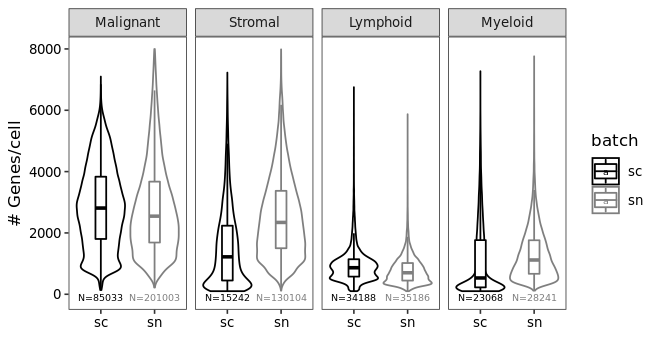

In [136]:
options(repr.plot.width = 5.5, repr.plot.height =3)
p1=ggplot(scsn, aes(x=batch,y=nFeature_RNA,col=batch))+geom_violin(scale = 'width')+
geom_boxplot(outlier.shape = NA,width = 0.2)+facet_wrap(~compartments,nrow=1)+xlab("")+ylab("# Genes/cell")+
stat_summary(fun.data = give.n,fun.args = c(y=-100), geom = "text",size=2)+scale_color_manual(values = c("black","grey50"))
p1

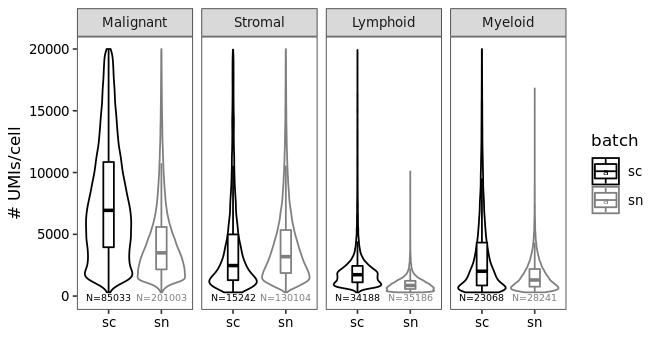

In [137]:
options(repr.plot.width = 5.5, repr.plot.height =3)
p2=ggplot(scsn, aes(x=batch,y=nCount_RNA,col=batch))+geom_violin(scale = 'width')+
geom_boxplot(outlier.shape = NA,width = 0.2)+facet_wrap(~compartments,nrow=1)+xlab("")+ylab("# UMIs/cell")+
stat_summary(fun.data = give.n,fun.args = c(y=-100), geom = "text",size=2)+scale_color_manual(values = c("black","grey50"))
p2

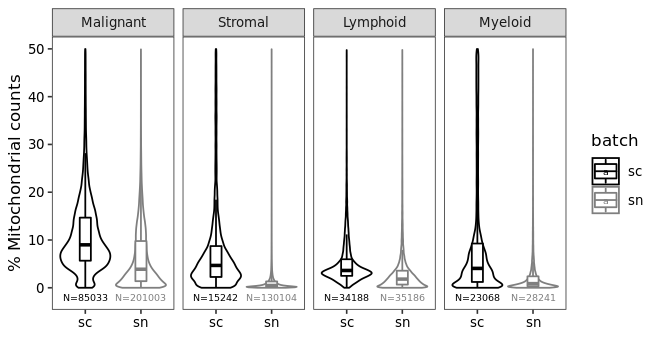

In [138]:
options(repr.plot.width = 5.5, repr.plot.height =3)
p3=ggplot(scsn, aes(x=batch,y=percent.mito,col=batch))+geom_violin(scale = 'width')+
geom_boxplot(outlier.shape = NA,width = 0.2)+facet_wrap(~compartments,nrow=1)+xlab("")+ylab("% Mitochondrial counts")+
stat_summary(fun.data = give.n,fun.args = c(y=-2), geom = "text",size=2)+scale_color_manual(values = c("black","grey50"))
p3

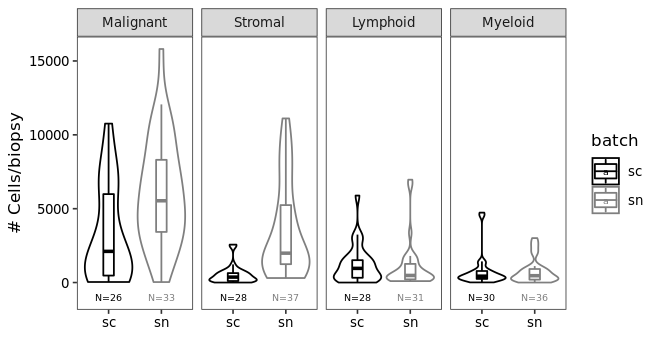

In [139]:
options(repr.plot.width = 5.5, repr.plot.height =3)
p4=ggplot(scsn[,.N,by=c("name","batch","compartments")], aes(x=batch,y=N,col=batch))+geom_violin(scale = 'width')+
geom_boxplot(outlier.shape = NA,width = 0.2)+facet_wrap(~compartments,nrow=1)+xlab("")+ylab("# Cells/biopsy")+
stat_summary(fun.data = give.n,fun.args = c(y=-1000), geom = "text",size=2)+scale_color_manual(values = c("black","grey50"))
p4

In [159]:
pdf("stats_scsn.pdf",width = 5.5,height = 2)
p1
p2
p3
p4
dev.off()

png 
  2

### Plot spatial methods

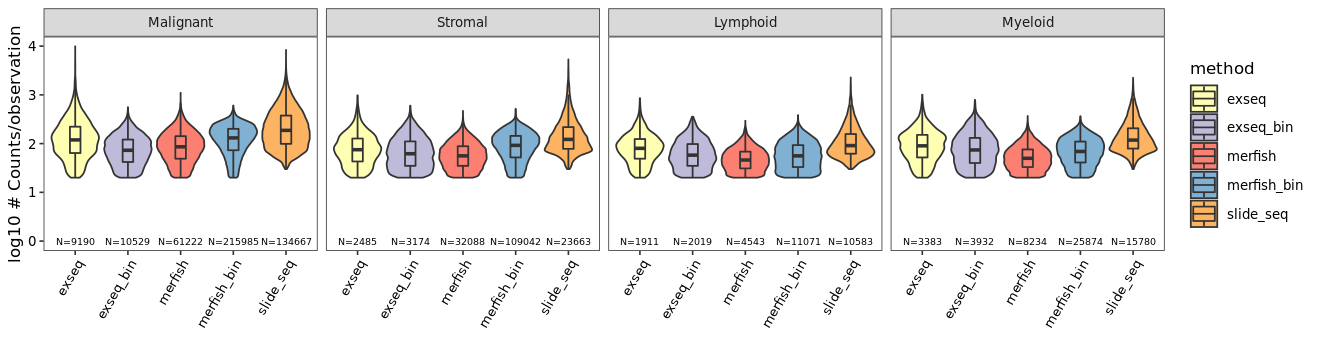

In [154]:
options(repr.plot.width = 11, repr.plot.height =3)
p5=ggplot(sp[!method%in%c("scRNAseq","codex")], aes(x=method,y=log10(n_counts),fill=method))+geom_violin(scale = 'width')+
geom_boxplot(outlier.shape = NA,width = 0.2)+facet_wrap(~compartments_OT,nrow=1)+xlab("")+ylab("log10 # Counts/observation")+
stat_summary(fun.data = give.n,fun.args = c(y=0), geom = "text",size=2)+rotate_labels()+
scale_fill_manual(values=RColorBrewer::brewer.pal(6, "Set3")[2:6])
p5

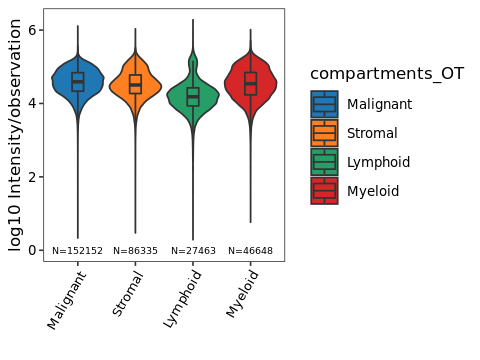

In [153]:
options(repr.plot.width = 4, repr.plot.height =3)
p6=ggplot(sp[method%in%c("codex")], aes(x=compartments_OT,y=log10(n_counts),fill=compartments_OT))+geom_violin(scale = 'width')+
geom_boxplot(outlier.shape = NA,width = 0.2)+xlab("")+ylab("log10 Intensity/observation")+
stat_summary(fun.data = give.n,fun.args = c(y=0), geom = "text",size=2)+rotate_labels()+
scale_fill_manual(values = c("#1f77b4","#ff7f21","#279e68","#d62728"))
p6

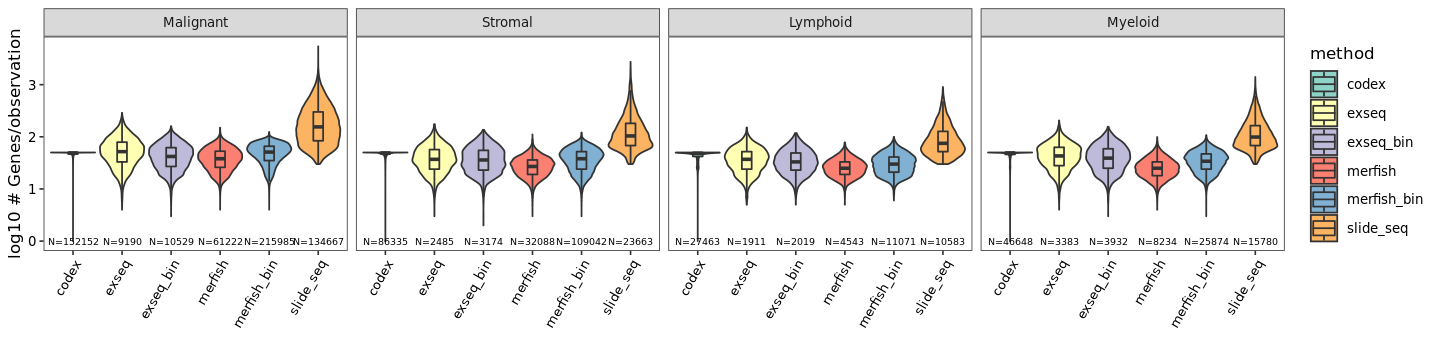

In [149]:
options(repr.plot.width =12, repr.plot.height =3)
p7=ggplot(sp[method!="scRNAseq"], aes(x=method,y=log10(n_genes),fill=method))+geom_violin(scale = 'width')+
geom_boxplot(outlier.shape = NA,width = 0.2)+facet_wrap(~compartments_OT,nrow=1)+xlab("")+ylab("log10 # Genes/observation")+
stat_summary(fun.data = give.n,fun.args = c(y=0), geom = "text",size=2)+rotate_labels()+
scale_fill_brewer(palette = "Set3")
p7

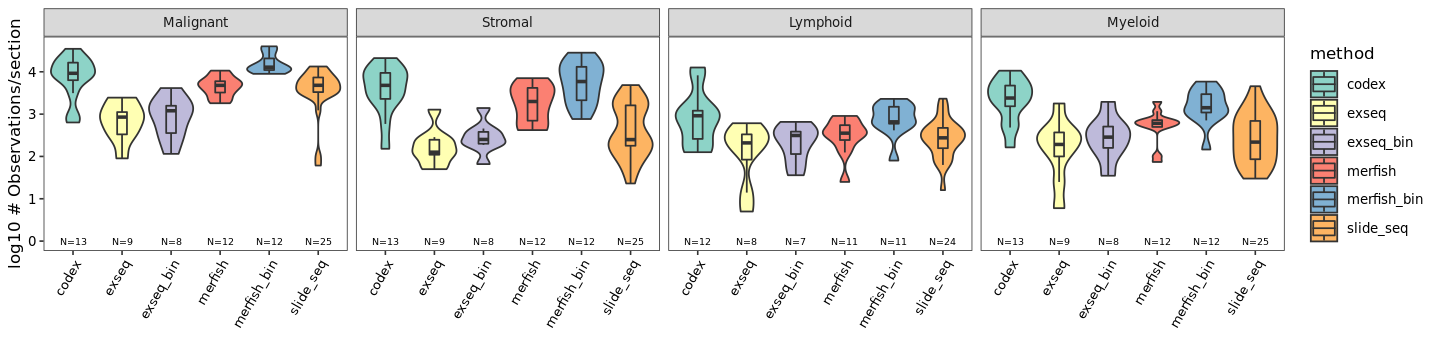

In [155]:
options(repr.plot.width = 12, repr.plot.height =3)
p8=ggplot(sp[method!="scRNAseq",.N,by=c("sample","method","replicate","compartments_OT")], aes(x=method,y=log10(N),fill=method))+geom_violin(scale = 'width')+
geom_boxplot(outlier.shape = NA,width = 0.2)+facet_wrap(~compartments_OT,nrow=1)+xlab("")+ylab("log10 # Observations/section")+
stat_summary(fun.data = give.n,fun.args = c(y=0), geom = "text",size=2)+rotate_labels()+scale_fill_brewer(palette = "Set3")
p8

In [156]:
pdf("stats_sp.pdf",width = 12,height = 3)
p5
p7
p8
dev.off()

png 
  2

In [157]:
pdf("stats_codex.pdf",width = 4,height = 3)
p6
dev.off()

png 
  2